In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('男胎检测数据_预处理后.csv')
df.head()

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,A001,31,160.0,72.0,2023-02-01,自然受孕,2023-04-29,1,11.86,...,0.025936,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,是
1,2,A001,31,160.0,73.0,2023-02-01,自然受孕,2023-05-31,2,15.86,...,0.034887,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,是
2,3,A001,31,160.0,73.0,2023-02-01,自然受孕,2023-06-25,3,20.14,...,0.066171,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,是
3,4,A001,31,160.0,74.0,2023-02-01,自然受孕,2023-07-16,4,22.86,...,0.061192,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,是
4,5,A002,32,149.0,74.0,2023-11-09,自然受孕,2024-02-19,1,13.86,...,0.059230,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,否


# pearson

In [4]:
相关性分析 = df.corr(method='pearson', numeric_only=True)
相关性分析

,序号,年龄,身高,体重,检测抽血次数,检测孕周,孕妇BMI,原始读段数,在参考基因组上比对的比例,重复读段的比例,...,21号染色体的Z值,X染色体的Z值,Y染色体的Z值,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,生产次数
序号,1.000000,0.012816,0.068644,-0.020937,-0.000399,-0.393755,-0.075401,0.023557,-0.017379,-0.015907,...,-0.040214,-0.147471,-0.065490,0.281503,-0.014812,-0.030884,-0.067356,-0.021701,0.044697,-0.194492
年龄,0.012816,1.000000,0.073896,0.045912,-0.013302,-0.002788,0.001417,-0.024629,0.019780,0.037646,...,-0.044002,-0.109170,-0.088913,-0.119391,-0.015614,0.065792,0.088069,0.081867,-0.000077,0.149179
身高,0.068644,0.073896,1.000000,0.618574,-0.016962,0.021516,0.088037,-0.004400,-0.006009,-0.037424,...,-0.049024,-0.025229,-0.028832,-0.104651,-0.029777,0.015257,0.008399,0.042183,0.019421,-0.038628
体重,-0.020937,0.045912,0.618574,1.000000,0.098417,0.130051,0.835318,-0.045254,0.011061,-0.029463,...,-0.047570,-0.017528,0.021700,-0.180529,-0.056389,0.005053,-0.017009,-0.010485,0.003953,0.021079
检测抽血次数,-0.000399,-0.013302,-0.016962,0.098417,1.000000,0.781604,0.137881,-0.068287,-0.075975,0.040555,...,0.077352,0.086399,0.056176,0.329890,0.174904,-0.028255,-0.045628,-0.043316,0.045536,-0.018750
检测孕周,-0.393755,-0.002788,0.021516,0.130051,0.781604,1.000000,0.149902,-0.070309,-0.069058,0.063649,...,0.048920,0.161397,0.114254,0.126507,0.181325,-0.028058,-0.011799,-0.056484,0.047371,0.036703
孕妇BMI,-0.075401,0.001417,0.088037,0.835318,0.137881,0.149902,1.000000,-0.054708,0.019882,-0.007481,...,-0.027088,-0.003850,0.050292,-0.151300,-0.046966,-0.004829,-0.029003,-0.044197,-0.008852,0.057726
原始读段数,0.023557,-0.024629,-0.004400,-0.045254,-0.068287,-0.070309,-0.054708,1.000000,0.059882,0.002203,...,-0.051007,-0.052746,-0.044630,-0.109941,-0.030401,-0.019363,-0.032350,-0.014563,0.198798,-0.052354
在参考基因组上比对的比例,-0.017379,0.019780,-0.006009,0.011061,-0.075975,-0.069058,0.019882,0.059882,1.000000,-0.170687,...,-0.008788,-0.043997,-0.008953,-0.105497,-0.028244,-0.071148,-0.030838,-0.046209,-0.174718,-0.023185
重复读段的比例,-0.015907,0.037646,-0.037424,-0.029463,0.040555,0.063649,-0.007481,0.002203,-0.170687,1.000000,...,-0.040971,-0.033135,0.003056,0.091610,0.082884,0.055680,-0.004049,0.065832,-0.067287,0.118721


In [5]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或 'Microsoft YaHei' 等
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

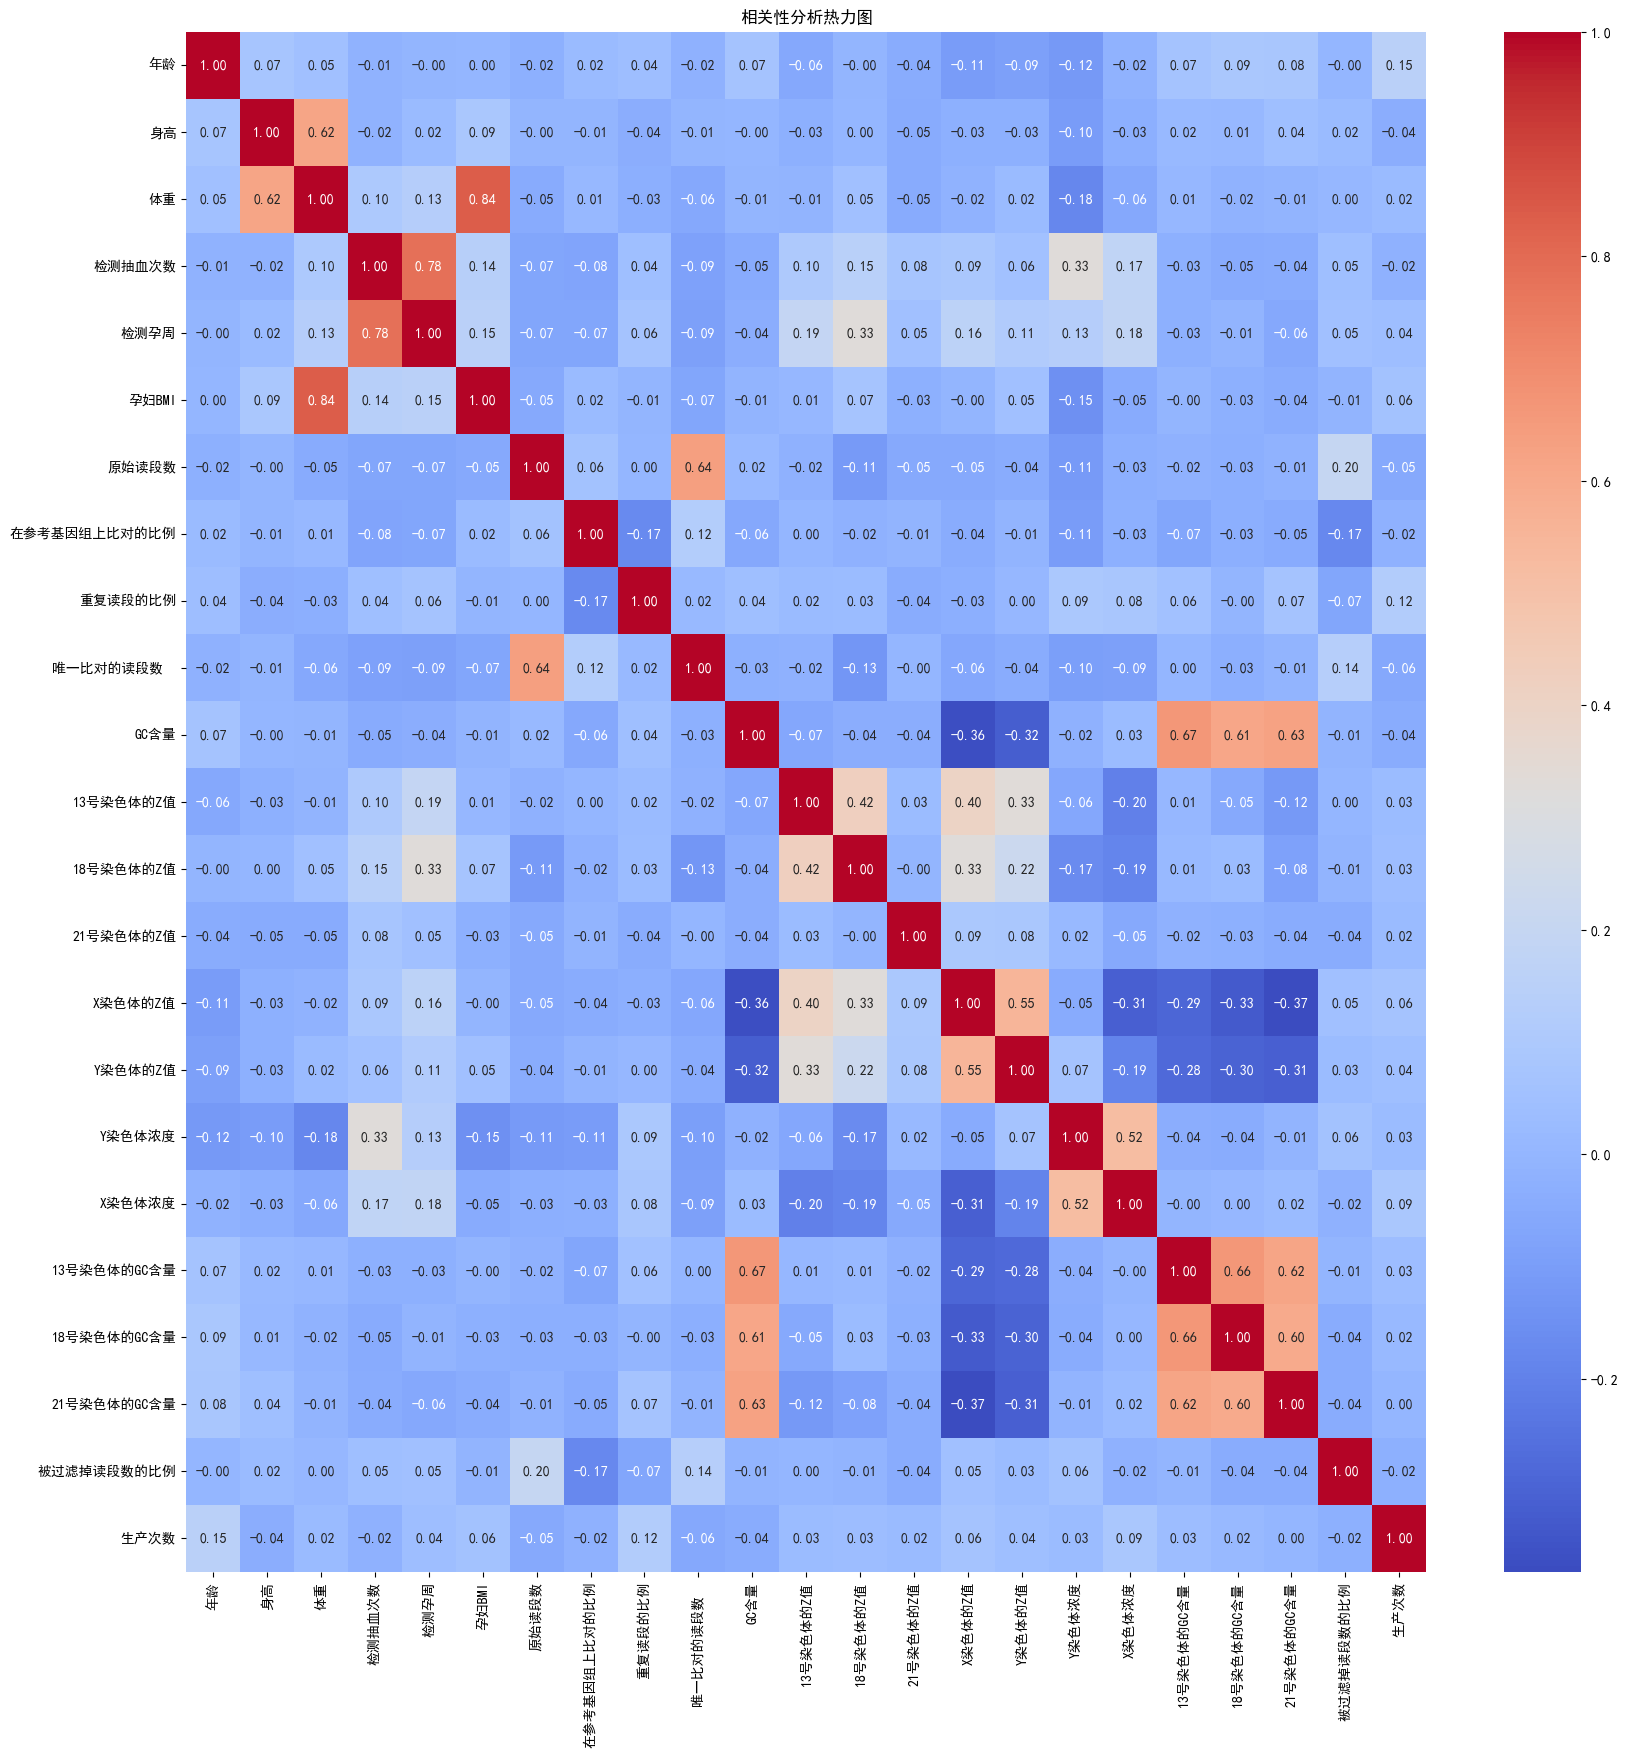

In [6]:
import seaborn as sns
data=相关性分析.drop('序号', axis=0).drop('序号', axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('相关性分析热力图')
plt.show()

<Axes: xlabel='体重', ylabel='Y染色体浓度'>

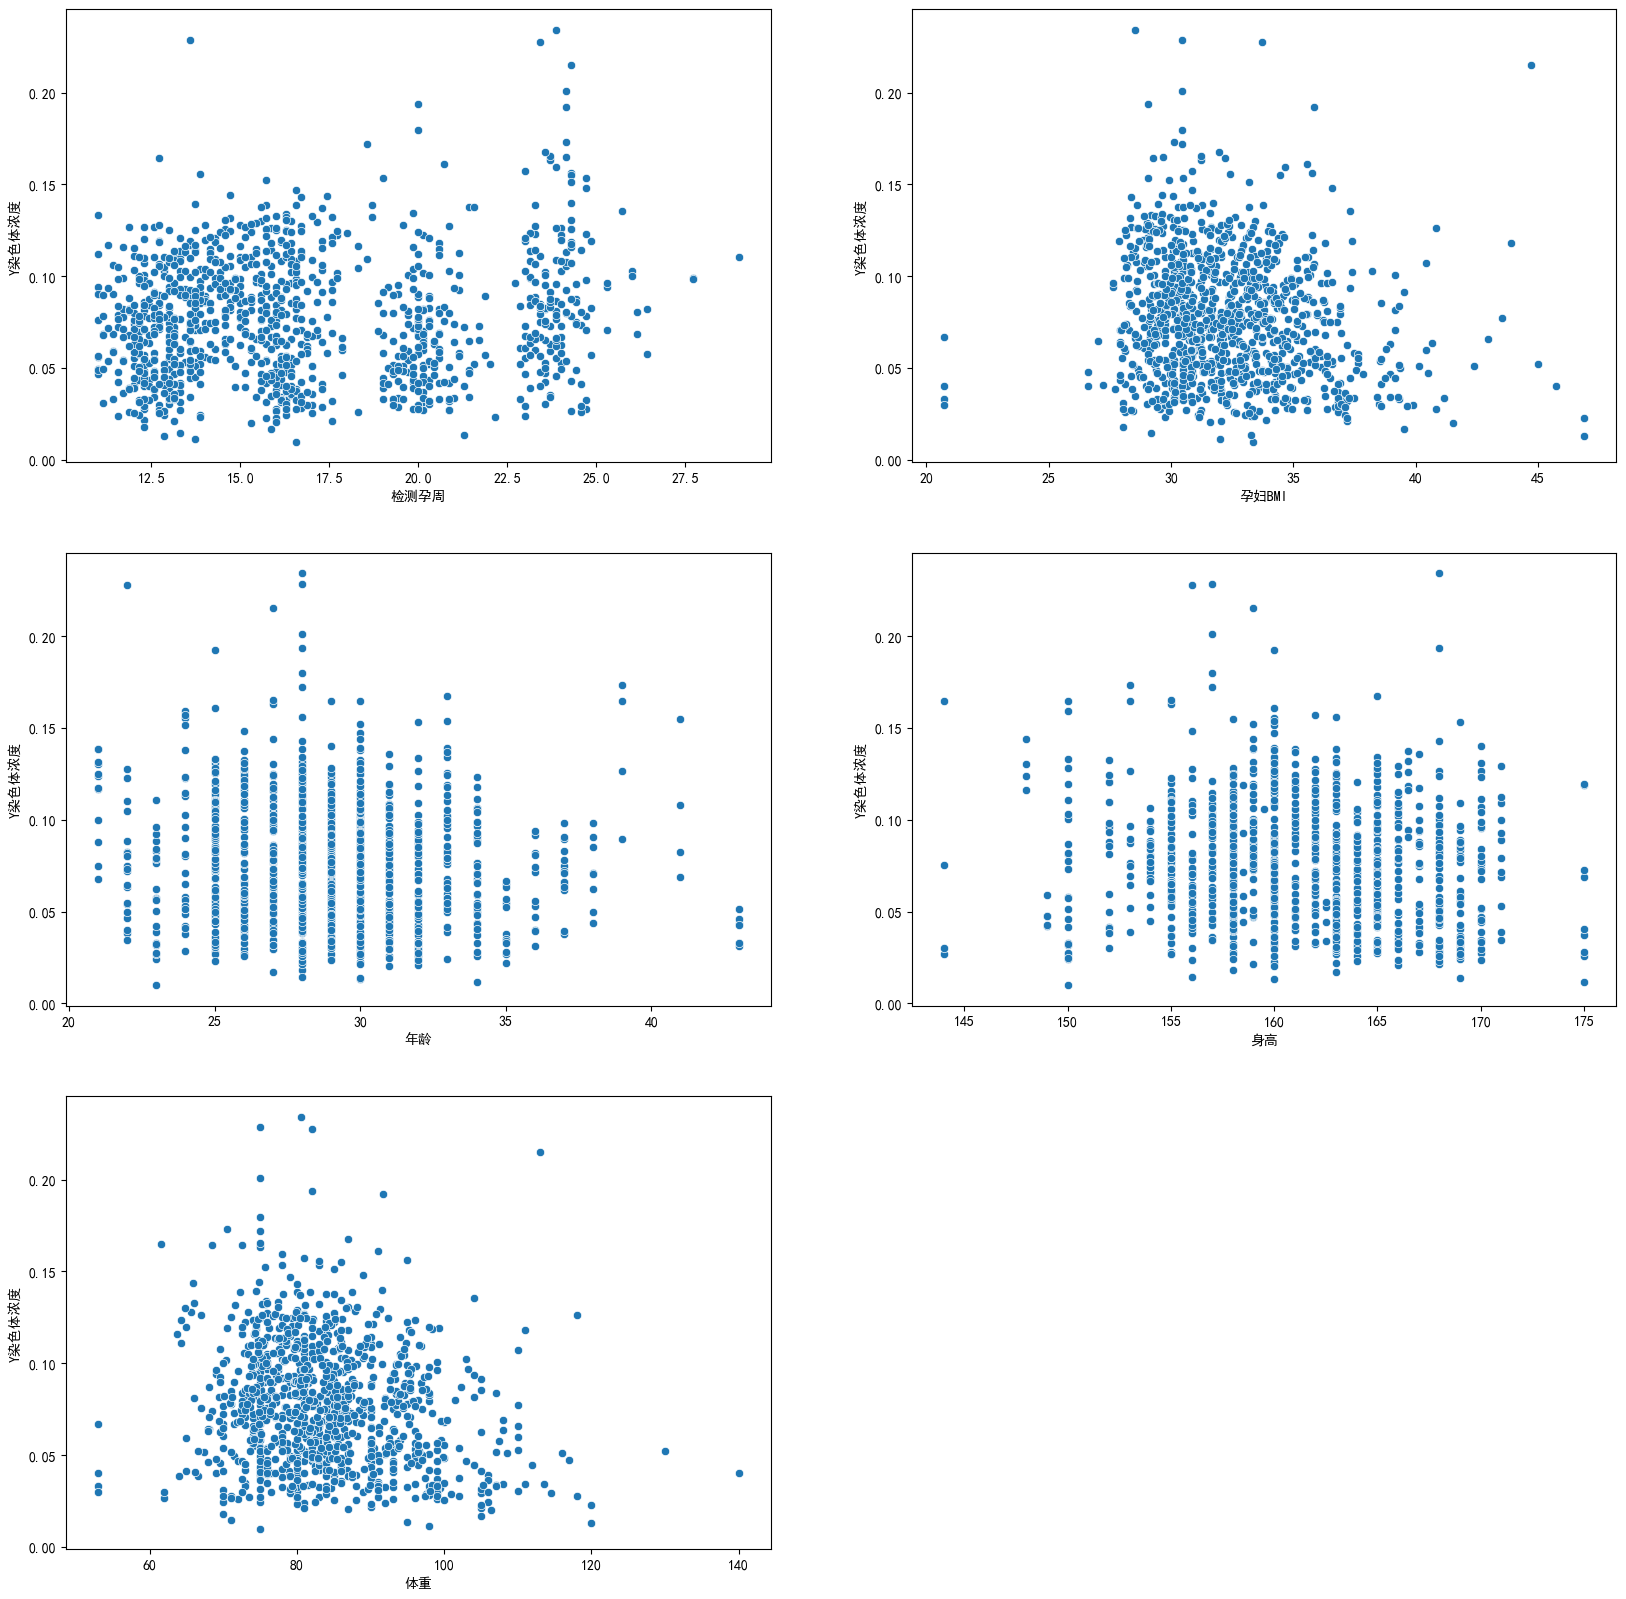

In [7]:
y_density = df['Y染色体浓度']
y_density_log = np.log1p(y_density)  # 对数转换，避免负值问题
plt.figure(figsize=(20,20))
plt.subplot(3,2, 1)
sns.scatterplot(x=df.检测孕周, y=y_density)
plt.subplot(3,2, 2)
sns.scatterplot(x=df.孕妇BMI, y=y_density)
plt.subplot(3,2, 3)
sns.scatterplot(x=df.年龄, y=y_density)
plt.subplot(3,2, 4)
sns.scatterplot(x=df.身高, y=y_density)
plt.subplot(3,2, 5)
sns.scatterplot(x=df.体重, y=y_density)

In [8]:
print("原始值示例:", y_density.head())
print("对数变换后示例:", y_density_log.head())

原始值示例: 0    0.025936
1    0.034887
2    0.066171
3    0.061192
4    0.059230
Name: Y染色体浓度, dtype: float64
对数变换后示例: 0    0.025605
1    0.034292
2    0.064074
3    0.059392
4    0.057542
Name: Y染色体浓度, dtype: float64


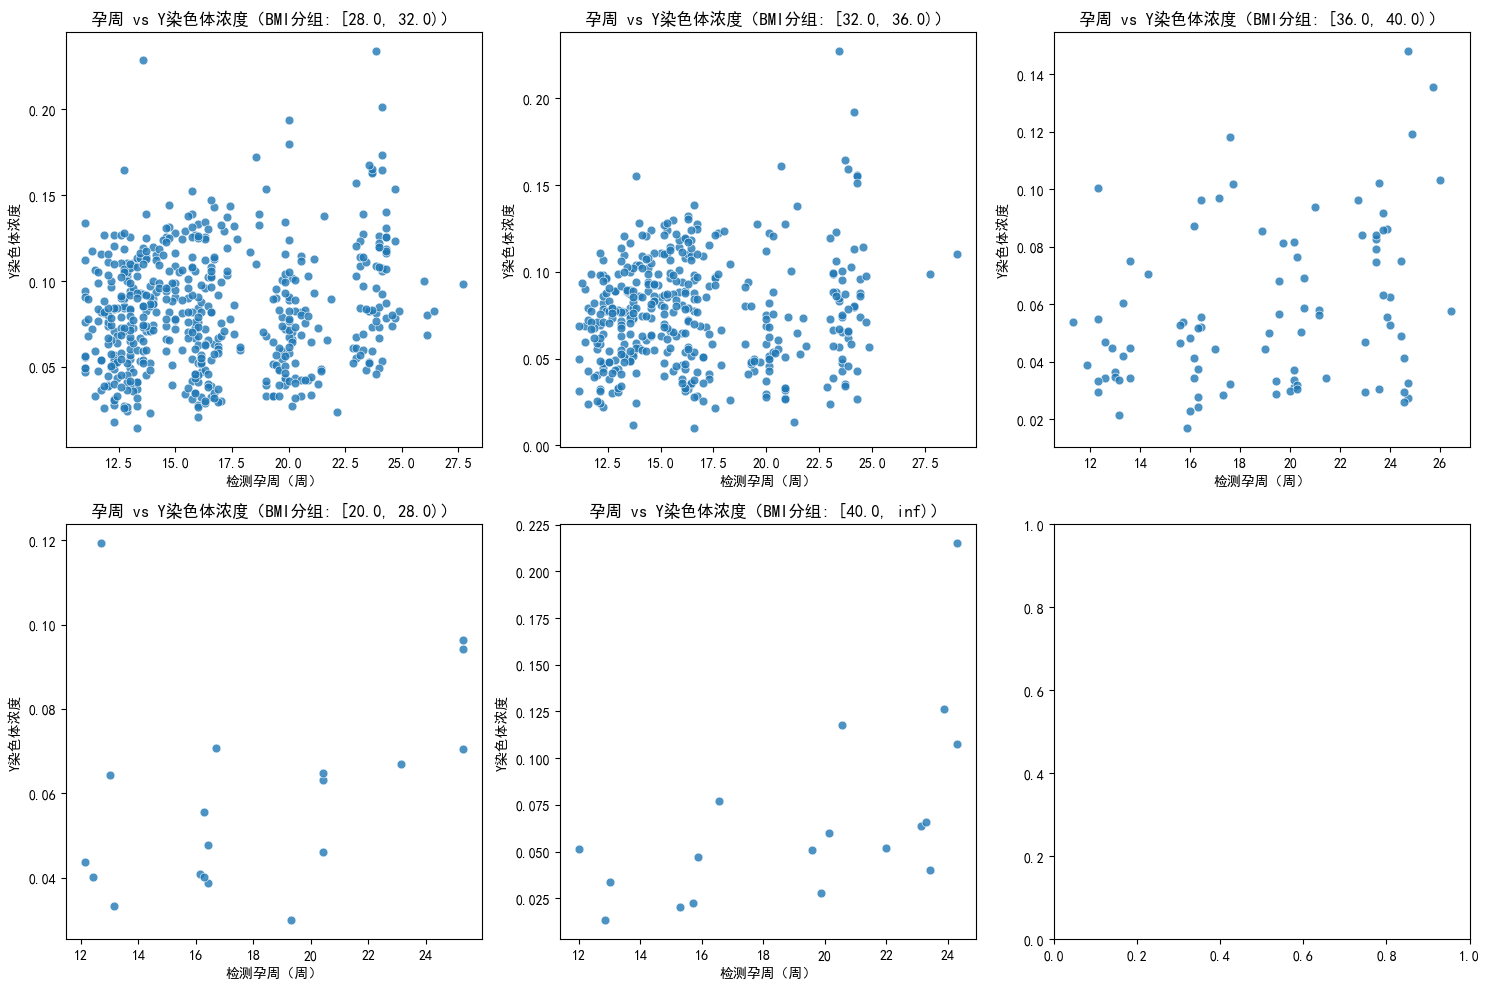

In [9]:
# 准备数据与BMI分组
bins = [-np.inf, 20, 28, 32, 36, 40, np.inf]
df_plot = df[['检测孕周','Y染色体浓度','孕妇BMI']].copy().dropna()
df_plot['BMI分组'] = pd.cut(df_plot['孕妇BMI'], bins=bins, right=False)

# 绘图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, group in enumerate(df_plot['BMI分组'].unique()):
    ax = axes.flat[i]
    subset = df_plot[df_plot['BMI分组'] == group]
    sns.scatterplot(data=subset, x='检测孕周', y='Y染色体浓度', ax=ax, alpha=0.8, s=40)
    ax.set_title(f'孕周 vs Y染色体浓度（BMI分组: {group}）')
    ax.set_xlabel('检测孕周（周）')
    ax.set_ylabel('Y染色体浓度')
plt.tight_layout()
plt.show()

In [10]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
import plotly.graph_objects as go

cols = ['孕妇BMI','检测孕周','Y染色体浓度']
df_plot = df[cols].copy().dropna()

fig = go.Figure(data=[go.Scatter3d(
    x=df_plot['孕妇BMI'],
    y=df_plot['检测孕周'],
    z=df_plot['Y染色体浓度'],
    mode='markers',
    marker=dict(
        size=5,
        color=df_plot['Y染色体浓度'],
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='孕妇BMI',
        yaxis_title='检测孕周（周）',
        zaxis_title='Y染色体浓度'
    ),
    title='Y染色体浓度-孕妇BMI-检测孕周 三维散点图'
)

fig.show()

## 对每位孕妇分别观察 

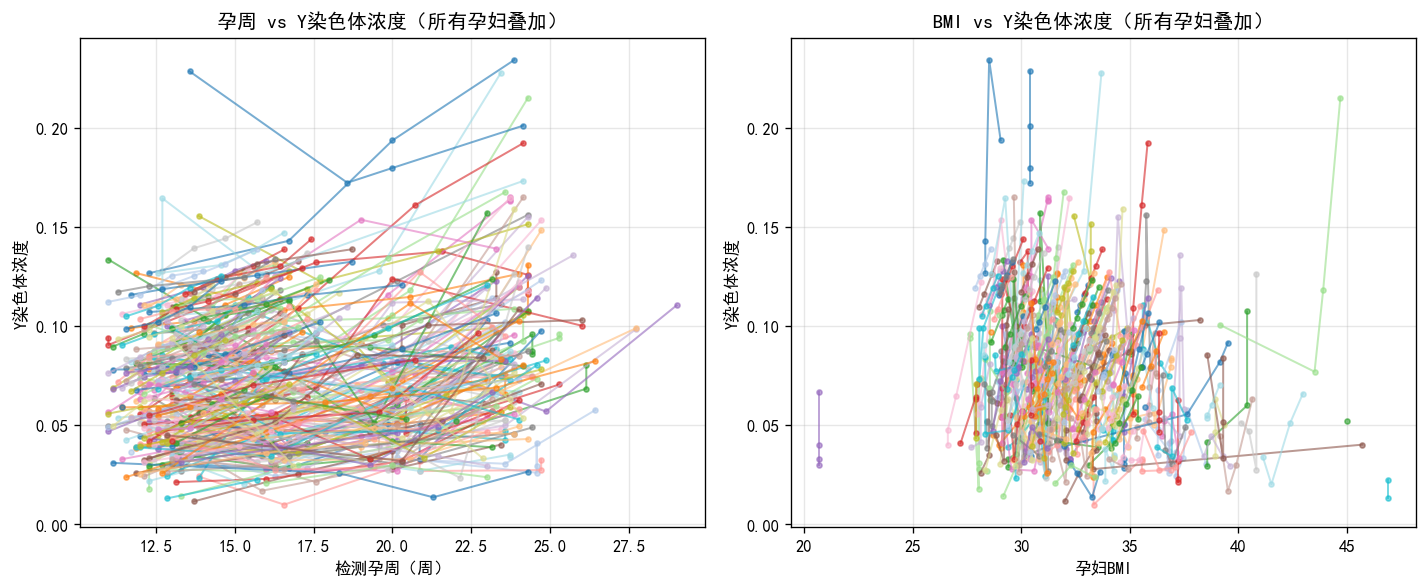

In [11]:
import itertools
import seaborn as sns

# 配置列名
id_col = '孕妇代码'
x_week = '检测孕周'
x_bmi  = '孕妇BMI'
y_col  = 'Y染色体浓度'

# 清洗
need_cols = [id_col, x_week, x_bmi, y_col]
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f'缺少列: {missing}')

df_plot = df[need_cols].copy()
for c in [x_week, x_bmi, y_col]:
    df_plot[c] = pd.to_numeric(df_plot[c], errors='coerce')
df_plot = df_plot.dropna()

# 按样本数排序，选择绘制的前 N 位（None 表示全部）
counts = df_plot.groupby(id_col).size().sort_values(ascending=False)
patient_ids = counts.index.tolist()
top_n = None  # 例如 50
if top_n:
    patient_ids = patient_ids[:top_n]

# 颜色循环
color_cycle = itertools.cycle(plt.cm.tab20.colors)

# 绘制叠加折线
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=120)

for pid, color in zip(patient_ids, color_cycle):
    g = df_plot[df_plot[id_col] == pid]

    # 左：孕周-浓度
    g_week = g.sort_values(x_week)
    axes[0].plot(g_week[x_week], g_week[y_col], marker='o', ms=3, lw=1.2,
                 alpha=0.6, color=color)

    # 右：BMI-浓度
    g_bmi = g.sort_values(x_bmi)
    axes[1].plot(g_bmi[x_bmi], g_bmi[y_col], marker='o', ms=3, lw=1.2,
                 alpha=0.6, color=color)

axes[0].set_xlabel('检测孕周（周）'); axes[0].set_ylabel('Y染色体浓度')
axes[0].set_title('孕周 vs Y染色体浓度（所有孕妇叠加）'); axes[0].grid(alpha=0.3)

axes[1].set_xlabel('孕妇BMI'); axes[1].set_ylabel('Y染色体浓度')
axes[1].set_title('BMI vs Y染色体浓度（所有孕妇叠加）'); axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# gamm拟合

In [12]:
import statsmodels.api as sm
from patsy import dmatrix

id_col = '孕妇代码'
y_col  = 'Y染色体浓度'
x_week = '检测孕周'
x_bmi  = '孕妇BMI'
lin_cols = ['年龄']

df_mm = df[[id_col, y_col, x_week, x_bmi] + lin_cols].copy()
for c in [y_col, x_week, x_bmi] + lin_cols:
    df_mm[c] = pd.to_numeric(df_mm[c], errors='coerce')
df_mm = df_mm.dropna()
grp_cnt = df_mm.groupby(id_col).size()
df_mm = df_mm[df_mm[id_col].isin(grp_cnt[grp_cnt >= 2].index)].copy()

# 样条与训练使用相同的自由度
week_spl = dmatrix("bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)",
                   df_mm, return_type='dataframe').add_prefix('week_')
bmi_spl  = dmatrix("bs(Q('孕妇BMI'), df=6, degree=3, include_intercept=False)",
                   df_mm, return_type='dataframe').add_prefix('bmi_')

# 特征与标准化参数
X_feat = pd.concat([week_spl, bmi_spl, df_mm[lin_cols]], axis=1)
std_feat = X_feat.std(ddof=0).replace(0, np.nan)
keep_cols = std_feat[std_feat.notna()].index  # 训练中保留的列
mu_ = X_feat[keep_cols].mean()
sigma_ = X_feat[keep_cols].std(ddof=0)

X = (X_feat[keep_cols] - mu_) / sigma_
X = sm.add_constant(X, has_constant='add')
fe_cols = X.columns  # 固定效应列顺序（含 const）

y = df_mm[y_col].values
groups = df_mm[id_col].values

print(f'X 维度: {X.shape}, 秩: {np.linalg.matrix_rank(X.values)}')

md = sm.MixedLM(endog=y, exog=X, groups=groups)
try:
    res = md.fit(reml=True, method='lbfgs', maxiter=1000)
except np.linalg.LinAlgError:
    res = md.fit(reml=True, method='nm', fe_pen=1e-4, cov_pen=1e-6, maxiter=2000)
print(res.summary())

X 维度: (1075, 14), 秩: 14
                                  Mixed Linear Model Regression Results
Model:                              MixedLM                 Dependent Variable:                 y        
No. Observations:                   1075                    Method:                             REML     
No. Groups:                         260                     Scale:                              0.0003   
Min. group size:                    2                       Log-Likelihood:                     2472.9130
Max. group size:                    8                       Converged:                          Yes      
Mean group size:                    4.1                                                                  
---------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------

d:\Develop\miniconda\envs\mcm\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning:

The MLE may be on the boundary of the parameter space.



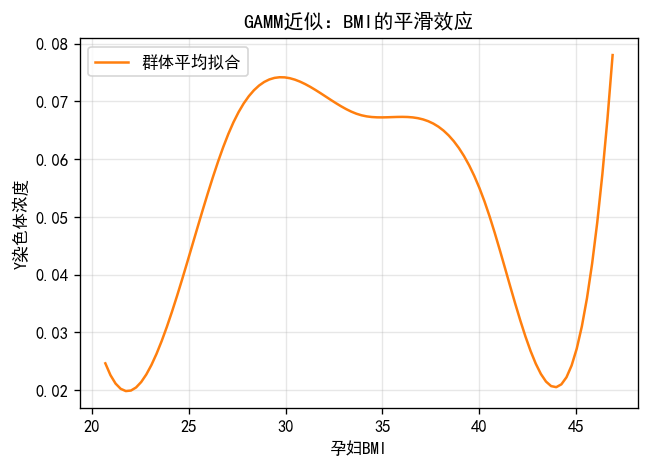

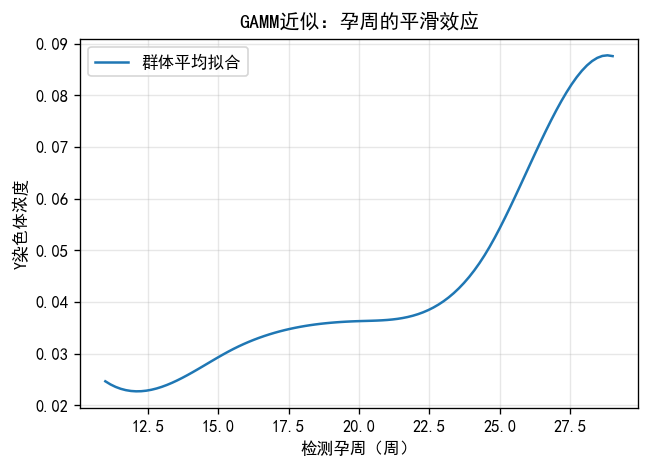

In [13]:
# 先绘制 BMI vs Y染色体浓度 的群体平均拟合（固定孕周与年龄为中位数）
grid_bmi = pd.DataFrame({
    x_week: np.median(df_mm[x_week]),
    x_bmi:  np.linspace(df_mm[x_bmi].min(), df_mm[x_bmi].max(), 100),
    '年龄':  np.median(df_mm['年龄'])
})
week_b = dmatrix("bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)",
                 grid_bmi, return_type='dataframe').add_prefix('week_')
bmi_b  = dmatrix("bs(Q('孕妇BMI'), df=6, degree=3, include_intercept=False)",
                 grid_bmi, return_type='dataframe').add_prefix('bmi_')

Xg_feat_bmi = pd.concat([week_b, bmi_b, grid_bmi[['年龄']]], axis=1)
Xg_feat_bmi = Xg_feat_bmi[keep_cols]
Xg_bmi = (Xg_feat_bmi - mu_) / sigma_
Xg_bmi = sm.add_constant(Xg_bmi, has_constant='add')
Xg_bmi = Xg_bmi.reindex(columns=fe_cols, fill_value=0)

yhat_bmi = res.predict(exog=Xg_bmi)

plt.figure(figsize=(6,4), dpi=120)
plt.plot(grid_bmi[x_bmi], yhat_bmi, label='群体平均拟合', color='tab:orange')
plt.xlabel('孕妇BMI'); plt.ylabel('Y染色体浓度'); plt.title('GAMM近似：BMI的平滑效应')
plt.grid(alpha=0.3); plt.legend(); plt.show()

# 再生成“孕周 vs Y染色体浓度”的网格，供下方现有代码使用
grid = pd.DataFrame({
    x_week: np.linspace(df_mm[x_week].min(), df_mm[x_week].max(), 100),
    x_bmi:  np.median(df_mm[x_bmi]),
    '年龄':  np.median(df_mm['年龄'])
})

week_g = dmatrix("bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)",
                 grid, return_type='dataframe').add_prefix('week_')
bmi_g  = dmatrix("bs(Q('孕妇BMI'), df=6, degree=3, include_intercept=False)",
                 grid, return_type='dataframe').add_prefix('bmi_')

Xg_feat = pd.concat([week_g, bmi_g, grid[['年龄']]], axis=1)
Xg_feat = Xg_feat[keep_cols]                 # 保持与训练相同的列
Xg = (Xg_feat - mu_) / sigma_                # 用训练均值/方差标准化
Xg = sm.add_constant(Xg, has_constant='add')
Xg = Xg.reindex(columns=fe_cols, fill_value=0)  # 列顺序完全对齐

yhat = res.predict(exog=Xg)

plt.figure(figsize=(6,4), dpi=120)
plt.plot(grid[x_week], yhat, label='群体平均拟合')
plt.xlabel('检测孕周（周）'); plt.ylabel('Y染色体浓度'); plt.title('GAMM近似：孕周的平滑效应')
plt.grid(alpha=0.3); plt.legend(); plt.show()

y_hat = γ0 + Σ_j γ_j · B_week_j(检测孕周) + Σ_k δ_k · B_bmi_k(孕妇BMI) + η · 年龄 + u_孕妇代码

其中 B_week_j、B_bmi_k 是 patsy 生成的 B 样条基函数（degree=3, df=6）。γ、δ、η 是把标准化吸收到系数后的“原始尺度系数”，u_孕妇代码 是随机截距（该孕妇的个体效应）。

In [14]:
# 1) 计算“原始特征空间”的系数（把标准化吸收进系数）
fe = pd.Series(res.fe_params, index=fe_cols)  # 固定效应系数（含 const）
coef_raw = pd.Series(index=['const'] + list(keep_cols), dtype=float)

# 非const列的缩放系数
scale = sigma_.copy()
shift = mu_.copy()

coef_raw['const'] = fe['const'] - (fe[keep_cols] * (shift/scale)).sum()
coef_raw[keep_cols] = fe[keep_cols] / scale

# 按块列出基函数列
week_cols = [c for c in keep_cols if c.startswith('week_')]
bmi_cols  = [c for c in keep_cols if c.startswith('bmi_')]
lin_only  = [c for c in keep_cols if c not in week_cols + bmi_cols]  # 例如 '年龄'

# 2) 打印“具体表达式”（可读形式）
print('=== 原始尺度下的模型表达式（无随机效应项）===')
print(f"y_hat = {coef_raw['const']:.6g}", end='')
for c in week_cols:
    print(f" + ({coef_raw[c]:.6g}) * B_week[{c.split('_')[-1]}](检测孕周)", end='')
for c in bmi_cols:
    print(f" + ({coef_raw[c]:.6g}) * B_bmi[{c.split('_')[-1]}](孕妇BMI)", end='')
for c in lin_only:
    print(f" + ({coef_raw[c]:.6g}) * {c}", end='')
print("\n注：B_week[·]/B_bmi[·] 为 patsy 的 B 样条基函数（degree=3, df=6）。")

# 3) 用原始尺度系数进行预测（验证与 res.predict 一致）
grid = pd.DataFrame({
    x_week: np.linspace(df_mm[x_week].min(), df_mm[x_week].max(), 50),
    x_bmi:  np.median(df_mm[x_bmi]),
    '年龄':  np.median(df_mm['年龄'])
})
week_g = dmatrix("bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)",
                 grid, return_type='dataframe').add_prefix('week_')
bmi_g  = dmatrix("bs(Q('孕妇BMI'), df=6, degree=3, include_intercept=False)",
                 grid, return_type='dataframe').add_prefix('bmi_')

Xg_raw = pd.concat([week_g, bmi_g, grid[['年龄']]], axis=1)[keep_cols]
yhat_raw = coef_raw['const'] + Xg_raw.mul(coef_raw[keep_cols], axis=1).sum(axis=1)

# 同一管线（标准化对齐）下的官方预测
Xg_feat = Xg_raw.copy()
Xg = (Xg_feat - mu_) / sigma_
Xg = sm.add_constant(Xg, has_constant='add')
Xg = Xg.reindex(columns=fe_cols, fill_value=0)
yhat_official = res.predict(exog=Xg)

print('\n预测一致性校验（应接近0）：', np.max(np.abs(yhat_raw - yhat_official)))

# 4) 可选：查看某位孕妇的随机截距（若模型含随机截距）
some_id = df_mm['孕妇代码'].iloc[0]
u = res.random_effects.get(some_id, 0.0)
print(f"\n孕妇 {some_id} 的随机截距 u_{some_id} ≈ {float(u):.6g}（若无则为0）")
print("个体化预测：y_hat_i = y_hat + u_孕妇代码")

=== 原始尺度下的模型表达式（无随机效应项）===
y_hat = 0.0526651 + (-0.00547423) * B_week[intercept=False)[0]](检测孕周) + (0.00931986) * B_week[intercept=False)[1]](检测孕周) + (0.0124174) * B_week[intercept=False)[2]](检测孕周) + (0.0109096) * B_week[intercept=False)[3]](检测孕周) + (0.0653995) * B_week[intercept=False)[4]](检测孕周) + (0.0629567) * B_week[intercept=False)[5]](检测孕周) + (-0.0194315) * B_bmi[intercept=False)[0]](孕妇BMI) + (0.0695349) * B_bmi[intercept=False)[1]](孕妇BMI) + (0.0332035) * B_bmi[intercept=False)[2]](孕妇BMI) + (0.0559923) * B_bmi[intercept=False)[3]](孕妇BMI) + (-0.0432123) * B_bmi[intercept=False)[4]](孕妇BMI) + (0.0533586) * B_bmi[intercept=False)[5]](孕妇BMI) + (-0.000965641) * 年龄
注：B_week[·]/B_bmi[·] 为 patsy 的 B 样条基函数（degree=3, df=6）。

预测一致性校验（应接近0）： 4.163336342344337e-17

孕妇 A001 的随机截距 u_A001 ≈ -0.0318356（若无则为0）
个体化预测：y_hat_i = y_hat + u_孕妇代码


C:\Users\HP\AppData\Local\Temp\ipykernel_64352\1549126721.py:54: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [15]:
from scipy.stats import norm

# 显著性检验：固定效应逐项与分组（Wald 检验）

# 名称集合：固定效应与全部参数
fe_names = res.fe_params.index                  # 固定效应名（含 const）
all_names = res.params.index                    # 全部参数名（含方差分量等）

coef = res.fe_params.copy()
se = res.bse_fe.reindex(fe_names)
zval = coef / se
pval = 2 * (1 - norm.cdf(np.abs(zval)))
ci = res.conf_int().reindex(fe_names)
ci.columns = ['ci_low', 'ci_high']

fe_table = pd.DataFrame({
    'coef': coef,
    'se': se,
    'z': zval,
    'p': pval,
    'ci_low': ci['ci_low'],
    'ci_high': ci['ci_high'],
}).sort_values('p')

print('=== 固定效应逐项显著性（按 p 值升序）===')
display(fe_table)

# 若前面未定义，基于 fe_names 重新划分块
week_cols = [n for n in fe_names if str(n).startswith('week_')]
bmi_cols  = [n for n in fe_names if str(n).startswith('bmi_')]
lin_only  = [n for n in fe_names if n not in week_cols + bmi_cols + ['const']]

# 分组 Wald：构造对“全参数”长度的约束矩阵
def wald_block(names, label):
    names = [n for n in names if n in all_names]   # 与全参数名取交集
    if not names:
        return pd.Series({'block': label, 'df': 0, 'chi2': np.nan, 'p': np.nan})
    k_total = len(all_names)
    R = np.zeros((len(names), k_total))
    col_idx = {n: i for i, n in enumerate(all_names)}
    for r, n in enumerate(names):
        R[r, col_idx[n]] = 1.0                     # 只约束对应固定效应的位置
    wt = res.wald_test(R)
    stat = float(np.atleast_1d(wt.statistic)[0])
    pv = float(np.atleast_1d(wt.pvalue)[0])
    return pd.Series({'block': label, 'df': len(names), 'chi2': stat, 'p': pv})

blocks = []
blocks.append(wald_block(week_cols, '检测孕周样条(整体)'))
blocks.append(wald_block(bmi_cols,  'BMI样条(整体)'))
blocks.append(wald_block(lin_only,  '线性项(整体)'))

wald_table = pd.DataFrame(blocks)
print('\n=== 分组 Wald 检验 ===')
display(wald_table)
# ...existing code...

=== 固定效应逐项显著性（按 p 值升序）===


,coef,se,z,p,ci_low,ci_high
const,0.077994,0.001834,42.521069,0.000000,0.074399,0.081589
"week_bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)[4]",0.010841,0.001293,8.387151,0.000000,0.008307,0.013374
"week_bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)[5]",0.003585,0.000803,4.463421,0.000008,0.002011,0.005159
"week_bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)[2]",0.003187,0.001399,2.278139,0.022718,0.000445,0.005930
"bmi_bs(Q('孕妇BMI'), df=6, degree=3, include_intercept=False)[1]",0.013249,0.005851,2.264523,0.023542,0.001782,0.024716
"week_bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)[1]",0.002141,0.001095,1.954583,0.050632,-0.000006,0.004288
年龄,-0.003534,0.001838,-1.922051,0.054599,-0.007137,0.000070
"bmi_bs(Q('孕妇BMI'), df=6, degree=3, include_intercept=False)[3]",0.009887,0.005541,1.784392,0.074360,-0.000973,0.020746
"week_bs(Q('检测孕周'), df=6, degree=3, include_intercept=False)[3]",0.002178,0.001230,1.770269,0.076682,-0.000233,0.004590
"bmi_bs(Q('孕妇BMI'), df=6, degree=3, include_intercept=False)[5]",0.003136,0.002055,1.525885,0.127039,-0.000892,0.007164



=== 分组 Wald 检验 ===


d:\Develop\miniconda\envs\mcm\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning:

The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.

C:\Users\HP\AppData\Local\Temp\ipykernel_64352\2767987507.py:44: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



,block,df,chi2,p
0,检测孕周样条(整体),6,444.707398,6.760525e-93
1,BMI样条(整体),6,22.547757,9.629944e-04
2,线性项(整体),1,3.694278,5.459939e-02


正在收集工作区信息下面基于你当前两份 notebook 的代码结构，总结关系模型与显著性解读（不含具体数值；请以运行输出为准）。

- 数据与相关性
  - 数据来源：`df` 读取 男胎检测数据_预处理后.csv，该文件由预处理笔记本生成（见 数据预处理.ipynb 中孕周解析与数值化）。
  - 皮尔逊相关：[`相关性分析 = df.corr(method='pearson', numeric_only=True)`](prenatal-testing/Q1/相关性分析.ipynb) 并绘制热力图（去掉“序号”）。解读要点：
    - 关注 Y染色体浓度 与 检测孕周、孕妇BMI 的相关系数及符号。医学与以往经验常见模式是：与孕周正相关、与BMI负相关；请以热力图上的数值为准（|r|≥0.3 且 p 小时提示中等相关）。

- 可视化佐证
  - 散点：`sns.scatterplot` 分别画出 Y染色体浓度 与 检测孕周、BMI、年龄、身高、体重的关系；如点云随孕周上升、随BMI上升而下降，即与相关结果一致。
  - BMI分组：按区间分组后作图（[`df_plot['BMI分组']`](prenatal-testing/Q1/相关性分析.ipynb)）。若各组的“孕周-浓度”曲线呈单调上升且高BMI组整体更低，说明BMI对水平有系统性下拉作用（截距差异）。
  - 三维散点：`go.Scatter3d` 展示 BMI-孕周-Y三者关系，有助于观察非线性与交互的直观形态。

- 关系模型（GAMM 近似的混合效应）
  - 模型定义在 `MixedLM`：以每位孕妇为分组随机截距，固定效应用 B 样条刻画非线性：
    - y = f_week(检测孕周) + f_bmi(孕妇BMI) + β_age·年龄 + u_孕妇代码 + ε
    - 其中 f_week 与 f_bmi 由 patsy B 样条基函数构成（df=6, degree=3），参见构造矩阵 `week_spl`, `bmi_spl`。
  - 训练前对特征标准化并添加常数项，见 `X`, `fe_cols`, `mu_`, `sigma_`。秩检查输出确保无共线性问题（`X 维度 ... 秩 ...`）。

- 显著性检验与解读
  - 单项（Wald z 检验）：`fe_table` 基于 `res.fe_params` 与标准误给出每个固定效应（包含各样条基函数项）的系数、z 值与 p 值。解读：
    - 若多数组“week_·”项 p<0.05，表明孕周的非线性成分显著；
    - 若多数组“bmi_·”项 p<0.05，表明BMI的非线性成分显著；
    - 线性项“年龄”若 p≥0.05，多为不显著，可考虑是否保留。
  - 区块（分组 Wald 检验）：`wald_table` 对“检测孕周样条(整体)”“BMI样条(整体)”“线性项(整体)”分别给出卡方统计量与 p 值。解读：
    - “检测孕周样条(整体)”p≪0.05：总体上孕周对 Y 浓度的平滑效应显著；
    - “BMI样条(整体)”p≪0.05：总体上 BMI 的平滑效应显著；
    - “线性项(整体)”若 p 较大，则线性协变量整体贡献有限。
  - 随机效应：在 `res.summary()` 查看随机截距方差；方差>0 且置信区间不含0时，说明个体差异显著。也可用示例打印的 `res.random_effects` 检视某位孕妇的 u 值。

- 结论范式（请据你运行的数值与图形核对）
  - 若热力图中 Y–孕周为正相关，Y–BMI为负相关，且区块 Wald 检验两者均显著：则可得
    1) 孕周对 Y染色体浓度存在显著的正向非线性效应（早期上升更快，后期趋缓常见）；
    2) BMI 对 Y染色体浓度存在显著的负向效应（BMI 越高整体水平越低，可能呈单调关系）；
    3) 年龄多为不显著或效应较弱；
    4) 随机截距显著提示不同孕妇间存在系统性基线差异。
  - 你已提供了对数变换的示例变量 `y_density_log`，若残差异方性明显，建议将模型的响应改为 log(1+Y) 以提升稳健性，并复核显著性。

如需我基于你实际运行结果（`res.summary()`、`fe_table`、`wald_table` 的具体数值）给出定量结论，请在输出单元中展示这些表的关键行。

# r^2 计算

In [16]:
# 计算边际 R² - 仅考虑固定效应的解释能力
def marginal_r2(model_result, y_observed, X_matrix):
    """
    边际 R² = 固定效应解释的方差 / 总方差
    """
    # 固定效应预测值（不含随机效应）
    y_fixed = model_result.predict(exog=X_matrix)

    # 计算方差
    var_fixed = np.var(y_fixed, ddof=1)
    var_total = np.var(y_observed, ddof=1)

    r2_marginal = var_fixed / var_total
    return r2_marginal


# 使用你的数据计算
r2_m = marginal_r2(res, y, X)
print(f"边际 R² (固定效应): {r2_m:.4f}")

边际 R² (固定效应): 0.1852


In [17]:
def nakagawa_r2(model_result, y_observed, X_matrix, groups):
    """
    Nakagawa & Schielzeth (2013) 方法计算混合效应模型 R²
    """
    # 固定效应方差
    y_fixed = model_result.predict(exog=X_matrix)
    var_fixed = np.var(y_fixed, ddof=1)

    # 随机效应方差（从模型中提取）
    try:
        # 随机截距方差
        var_random = (
            float(model_result.cov_re.iloc[0, 0])
            if hasattr(model_result, "cov_re")
            else 0.0
        )
    except:
        # 备选方法：从随机效应预测值计算
        random_effects_values = []
        unique_groups = np.unique(groups)
        for group_id in unique_groups:
            re = model_result.random_effects.get(group_id, 0.0)
            if hasattr(re, "iloc"):
                re = re.iloc[0]
            random_effects_values.append(float(re))
        var_random = (
            np.var(random_effects_values, ddof=1)
            if len(random_effects_values) > 1
            else 0.0
        )

    # 残差方差
    var_residual = model_result.scale  # 残差方差

    # 计算 R²
    r2_marginal = var_fixed / (var_fixed + var_random + var_residual)
    r2_conditional = (var_fixed + var_random) / (var_fixed + var_random + var_residual)

    return (
        r2_marginal,
        r2_conditional,
        {
            "var_fixed": var_fixed,
            "var_random": var_random,
            "var_residual": var_residual,
        },
    )


# 计算 Nakagawa R²
r2_m_nak, r2_c_nak, variance_components = nakagawa_r2(res, y, X, groups)

print("=== Nakagawa & Schielzeth R² ===")
print(f"边际 R² (固定效应): {r2_m_nak:.4f}")
print(f"条件 R² (固定+随机效应): {r2_c_nak:.4f}")
print("\n方差分解:")
print(f"固定效应方差: {variance_components['var_fixed']:.6f}")
print(f"随机效应方差: {variance_components['var_random']:.6f}")
print(f"残差方差: {variance_components['var_residual']:.6f}")

=== Nakagawa & Schielzeth R² ===
边际 R² (固定效应): 0.1616
条件 R² (固定+随机效应): 0.7852

方差分解:
固定效应方差: 0.000208
随机效应方差: 0.000805
残差方差: 0.000277


In [18]:
def conditional_r2(model_result, y_observed, X_matrix, groups):
    """
    条件 R² = (固定效应 + 随机效应)解释的方差 / 总方差
    """
    # 包含随机效应的完整预测
    y_full_pred = []
    for i, group_id in enumerate(groups):
        # 固定效应预测
        y_fixed_i = model_result.predict(exog=X_matrix.iloc[[i]])
        # 随机效应
        random_effect = model_result.random_effects.get(group_id, 0.0)
        if hasattr(random_effect, "iloc"):
            random_effect = random_effect.iloc[0]
        y_full_pred.append(float(y_fixed_i) + float(random_effect))

    y_full_pred = np.array(y_full_pred)

    # 计算残差方差
    residuals = y_observed - y_full_pred
    var_residual = np.var(residuals, ddof=1)
    var_total = np.var(y_observed, ddof=1)

    r2_conditional = 1 - (var_residual / var_total)
    return r2_conditional, y_full_pred


# 计算条件 R²
r2_c, y_pred_full = conditional_r2(res, y, X, groups)
print(f"条件 R² (固定+随机效应): {r2_c:.4f}")

C:\Users\HP\AppData\Local\Temp\ipykernel_64352\1518368787.py:14: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



条件 R² (固定+随机效应): 0.8105


In [19]:
# 完整的 R² 分析
print("=== 混合效应模型 R² 分析 ===")

# 1. 基础相关系数
y_pred_fixed = res.predict(exog=X)
corr_fixed = np.corrcoef(y, y_pred_fixed)[0, 1]
r2_basic = corr_fixed**2

print(f"1. 基础 R² (固定效应预测): {r2_basic:.4f}")
print(f"   观测值与固定效应预测相关系数: {corr_fixed:.4f}")

# 2. Nakagawa 方法
r2_m_nak, r2_c_nak, var_comp = nakagawa_r2(res, y, X, groups)
print(f"\n2. Nakagawa & Schielzeth R²:")
print(f"   边际 R² (固定效应): {r2_m_nak:.4f}")
print(f"   条件 R² (固定+随机): {r2_c_nak:.4f}")

# 3. 方差解释
total_var = var_comp["var_fixed"] + var_comp["var_random"] + var_comp["var_residual"]
print(f"\n3. 方差分解 (总方差 = {total_var:.6f}):")
print(f"   固定效应解释: {var_comp['var_fixed']/total_var:.1%}")
print(f"   随机效应解释: {var_comp['var_random']/total_var:.1%}")
print(f"   残差(未解释): {var_comp['var_residual']/total_var:.1%}")

# 4. 模型拟合质量
print(f"\n4. 模型信息:")
print(f"   AIC: {res.aic:.2f}")
print(f"   BIC: {res.bic:.2f}")
print(f"   Log-likelihood: {res.llf:.2f}")

=== 混合效应模型 R² 分析 ===
1. 基础 R² (固定效应预测): 0.0754
   观测值与固定效应预测相关系数: 0.2746

2. Nakagawa & Schielzeth R²:
   边际 R² (固定效应): 0.1616
   条件 R² (固定+随机): 0.7852

3. 方差分解 (总方差 = 0.001290):
   固定效应解释: 16.2%
   随机效应解释: 62.4%
   残差(未解释): 21.5%

4. 模型信息:
   AIC: nan
   BIC: nan
   Log-likelihood: 2472.91
